In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import prep_plays
import wrangle_plays_data
from scipy import stats
pd.set_option('display.max_columns', None)

Acquire.py Loaded Successfully
Prep.py Loaded Successfully
Wrangle.py Loaded Successfully


In [2]:
df = prep_plays.prep_plays_data()

In [3]:
df.shape

(17001, 30)

In [4]:
df.isnull().sum()

playDescription           0
quarter                   0
down                      0
yardsToGo                 0
team_by_comp_yds          0
defendersInTheBox         0
numberOfPassRushers       0
QB_under_pressure         0
gameClock                 0
absoluteYardlineNumber    0
epa                       0
pass_stopped              0
playResult                0
RB                        0
TE                        0
WR                        0
DL                        0
LB                        0
DB                        0
EMPTY                     0
I_FORM                    0
JUMBO                     0
PISTOL                    0
SHOTGUN                   0
SINGLEBACK                0
WILDCAT                   0
four_three                0
three_four                0
nickel                    0
dime                      0
dtype: int64

In [5]:
df.head()

,playDescription,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,gameClock,absoluteYardlineNumber,epa,pass_stopped,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime
0,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,3,7.0,4.0,0.0,15:00:00,90.0,0.261827,0,10,2,1,2,4,2,5,0,1,0,0,0,0,0,0,0,1,0
1,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,3,7.0,4.0,0.0,13:10:00,49.0,-0.372360,1,0,1,1,3,4,2,5,0,0,0,0,0,1,0,0,0,1,0
2,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,3,6.0,4.0,0.0,13:05:00,49.0,-0.702779,1,0,2,1,2,4,2,5,0,0,0,0,1,0,0,0,0,1,0
3,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,3,6.0,5.0,1.0,13:01:00,49.0,3.047530,0,33,1,1,3,4,1,6,0,0,0,0,1,0,0,0,0,0,1
4,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,3,8.0,6.0,0.0,10:59:00,11.0,-0.842272,1,0,2,3,0,6,3,2,0,0,0,0,1,0,0,0,0,0,0


In [6]:
df.pass_stopped.value_counts()

0    11054
1     5947
Name: pass_stopped, dtype: int64

In [7]:
df.columns

Index(['playDescription', 'quarter', 'down', 'yardsToGo', 'team_by_comp_yds',
       'defendersInTheBox', 'numberOfPassRushers', 'QB_under_pressure',
       'gameClock', 'absoluteYardlineNumber', 'epa', 'pass_stopped',
       'playResult', 'RB', 'TE', 'WR', 'DL', 'LB', 'DB', 'EMPTY', 'I_FORM',
       'JUMBO', 'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'WILDCAT', 'four_three',
       'three_four', 'nickel', 'dime'],
      dtype='object')

In [8]:
pd.set_option('display.max_colwidth', -1)
df.playDescription.head()

0    (15:00) M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).
1    (13:10) M.Ryan pass incomplete short right to C.Ridley (J.Mills, J.Hicks).              
2    (13:05) (Shotgun) M.Ryan pass incomplete short left to D.Freeman.                       
3    (13:01) (Shotgun) M.Ryan pass deep left to J.Jones to PHI 6 for 33 yards (R.Darby).     
4    (10:59) (Shotgun) M.Ryan pass incomplete short right to D.Freeman.                      
Name: playDescription, dtype: object

In [9]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_plays_data.train_validate_test(df)

In [10]:
X_train.head()

,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,absoluteYardlineNumber,epa,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime
4170,2,2,4,2,6.0,4.0,0.0,46.0,-0.611122,0,1,1,3,2,4,5,0,0,0,0,1,0,0,0,0,1,0
14076,4,1,10,12,6.0,5.0,0.0,65.0,-0.032445,6,1,2,2,3,4,4,1,0,0,0,0,0,0,0,1,0,0
15897,3,2,3,23,8.0,7.0,0.0,103.0,1.789159,7,1,1,3,4,2,5,0,0,0,0,1,0,0,0,0,1,0
2723,3,1,10,16,7.0,4.0,0.0,43.0,-0.025190,8,1,2,2,4,3,4,0,0,0,0,0,1,0,1,0,0,0
632,4,1,9,32,6.0,4.0,0.0,101.0,-0.066855,1,1,1,3,2,4,5,0,0,0,0,1,0,0,0,0,1,0


In [11]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle_plays_data.min_max_scale(X_train, X_validate, X_test)

In [12]:
X_train_scaled

,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,absoluteYardlineNumber,epa,DL,LB,DB,four_three,three_four,nickel,dime
4170,0.25,0.333333,0.103448,0.032258,0.500,0.500,0.0,0.357143,0.520279,0.333333,0.666667,0.571429,0.0,0.0,1.0,0.0
14076,0.75,0.000000,0.310345,0.354839,0.500,0.625,0.0,0.551020,0.551760,0.500000,0.666667,0.428571,0.0,1.0,0.0,0.0
15897,0.50,0.333333,0.068966,0.709677,0.750,0.875,0.0,0.938776,0.650855,0.666667,0.333333,0.571429,0.0,0.0,1.0,0.0
2723,0.50,0.000000,0.310345,0.483871,0.625,0.500,0.0,0.326531,0.552154,0.666667,0.500000,0.428571,1.0,0.0,0.0,0.0
632,0.75,0.000000,0.275862,1.000000,0.500,0.500,0.0,0.918367,0.549888,0.333333,0.666667,0.571429,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,0.25,0.000000,0.310345,0.096774,0.625,0.500,0.0,0.500000,0.690090,0.666667,0.333333,0.571429,0.0,0.0,1.0,0.0
10063,0.25,0.333333,0.068966,0.935484,0.375,0.500,0.0,0.744898,0.585577,0.333333,0.500000,0.714286,0.0,0.0,0.0,1.0
10013,0.50,0.666667,0.241379,0.516129,0.500,0.500,0.0,0.897959,0.687523,0.333333,0.500000,0.714286,0.0,0.0,0.0,1.0
3002,0.75,0.333333,0.068966,0.935484,0.625,0.500,0.0,0.153061,0.594821,0.666667,0.333333,0.571429,0.0,0.0,1.0,0.0


In [13]:
X_train.QB_under_pressure.value_counts()

0.0    6443
1.0    697 
Name: QB_under_pressure, dtype: int64

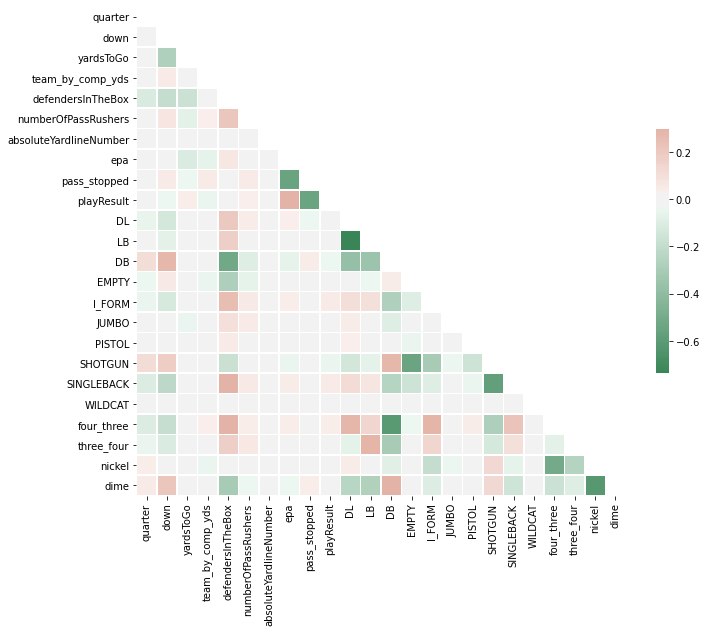

In [14]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 15.0, '')

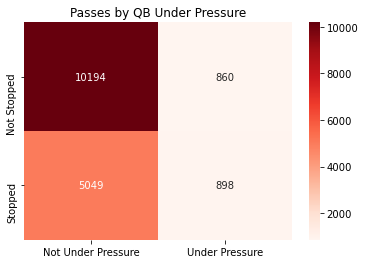

In [15]:
# Create crosstab of data I want to visualize
crosstab = pd.crosstab(df.pass_stopped, df.QB_under_pressure)
# Visualizes heatmap to see differences in values
sns.heatmap(crosstab, annot= True, cmap= 'Reds', fmt= 'd')

plt.title('Passes by QB Under Pressure')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Stopped', 'Stopped'))
plt.xticks(locs, ('Not Under Pressure', 'Under Pressure'))
plt.ylabel('')
plt.xlabel('')

In [16]:
incompletion_rate = (((df.pass_stopped == 1).sum()) / (df.pass_stopped.count())).round(2)
incompletion_rate

0.35

Comparing If Schemes And QB Pressure Impact Incompletion Rate


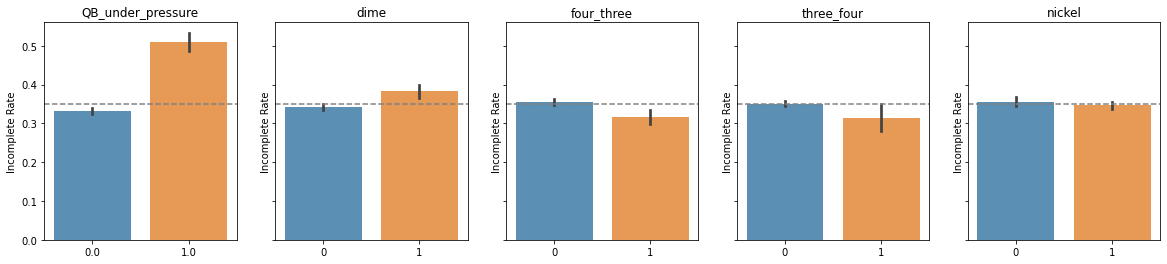

In [17]:
# List all the questions
features = ['QB_under_pressure','dime', 'four_three','three_four', 'nickel']

# subplot each questions side by side
# adding a line to measure where average autism rating is
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'pass_stopped', data=df, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Incomplete Rate')
    ax[i].set_title(feature)
    ax[i].axhline(incompletion_rate, ls='--', color='grey')
print('Comparing If Schemes And QB Pressure Impact Incompletion Rate')

## Conclusion
- Dime and Nickel have a closer to 50/50 chance of stopping the pass over 3-4 and 4-3 defensive schemes based on the data

## Hypothesis 1

H0: There is no difference in stopped passes between nickel defense and average nickel defense

Ha: There is a difference in stopped passes between nickel defense and average nickel defense

In [18]:
alpha= .05
stopped_pass = df[df.pass_stopped == 1]
t, p = stats.ttest_1samp(stopped_pass.nickel, df.nickel.mean())

print(f't = {t:.2f}')
print(f'p = {p:.90f}')
print(f'Our p-value is less than our alpha: {p < alpha}')

t = -0.92
p = 0.359110901654390746173817205999512225389480590820312500000000000000000000000000000000000000
Our p-value is less than our alpha: False


## Hypothesis 2

H0: There is no difference in stopped passes between dime defense and average dime defense

Ha: There is a difference in stopped passes between dime defense and average dime defense

In [19]:
alpha= .05
stopped_pass = df[df.pass_stopped == 1]
t, p = stats.ttest_1samp(stopped_pass.dime, df.dime.mean())

print(f't = {t:.2f}')
print(f'p = {p:.90f}')
print(f'Our p-value is less than our alpha: {p < alpha}')

t = 3.29
p = 0.000992312212899799537743628086161606915993615984916687011718750000000000000000000000000000
Our p-value is less than our alpha: True


## Hypothesis 3

H0: There is no difference in stopped passes between 3-4 defense and average 3-4 defense

Ha: There is a difference in stopped passes between 3-4 defense and average 3-4 defense

In [20]:
alpha= .05
stopped_pass = df[df.pass_stopped == 1]
t, p = stats.ttest_1samp(stopped_pass.three_four, df.three_four.mean())

print(f't = {t:.2f}')
print(f'p = {p:.90f}')
print(f'Our p-value is less than our alpha: {p < alpha}')

t = -1.65
p = 0.099846444755989846586707869846577523276209831237792968750000000000000000000000000000000000
Our p-value is less than our alpha: False


## Hypothesis 4

H0: There is no difference in stopped passes between 4-3 defense and average 4-3 defense

Ha: There is a difference in stopped passes between 4-3 defense and average 4-3 defense

In [21]:
alpha= .05
stopped_pass = df[df.pass_stopped == 1]
t, p = stats.ttest_1samp(stopped_pass.four_three, df.four_three.mean())

print(f't = {t:.2f}')
print(f'p = {p:.90f}')
print(f'Our p-value is less than our alpha: {p < alpha}')

t = -2.95
p = 0.003197485974375448725820492157367880281526595354080200195312500000000000000000000000000000
Our p-value is less than our alpha: True


## Hypothesis 5

H0: A defense stopping a pass is independent of QB pressure

Ha: A defense stopping a pass is not independent of QB pressure

In [22]:
crosstab = pd.crosstab(df.pass_stopped, df.QB_under_pressure)
Chi2, p, degf, expected = stats.chi2_contingency(crosstab)
print(f'Our p-value is {p:.90f}.')
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is 0.000000000000000000000000000000000000000000000000023449808347692850044076190410011891719755.
Our p-value is less than our alpha: True


## Hypothesis 6

H0: A defense stopping a pass is independent of which down it is

Ha: A defense stopping a pass is not independent of which down it is

In [23]:
crosstab = pd.crosstab(df.pass_stopped, df.down)
Chi2, p, degf, expected = stats.chi2_contingency(crosstab)
print(f'Our p-value is {p:.90f}.')
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is 0.000000000000000026269413671360425860932103196844396247666855744961993124331200988308410160.
Our p-value is less than our alpha: True


# Modeling

In [24]:
# Import the functions I will need for modeling
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Establish our baseline
baseline = ((df.pass_stopped == 1).sum() / df.pass_stopped.count()).round(2)
baseline

0.35

## Feature Engineering

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [27]:
## Assessing the RFE using a linear regression model
lr =  LogisticRegression(random_state=123)

rfe = RFE(lr, 10)
lm_X_rfe_train = rfe.fit_transform(X_train_scaled,y_train)
lm_X_rfe_val = rfe.transform(X_validate_scaled)
lm_X_rfe_test = rfe.transform(X_test_scaled)

In [28]:
## Here we want to filter through and return only the best features
mask = rfe.support_ 
rfe_features = X_train_scaled.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 10 features: quarter, down, yardsToGo, defendersInTheBox, numberOfPassRushers, QB_under_pressure, epa, DL, DB, four_three


In [29]:
# assign random forest to a variable
def random_forest(leaf, depth, estimator):
    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=estimator,
                            max_depth=depth, 
                            random_state=123)
    
    print('---------------------------- Train -------------------------------')
    
    # fit train data
    rf.fit(X_train_scaled, y_train)
    # assign predicitons
    y_pred = rf.predict(X_train_scaled)
    # assign probabilities
    y_pred_proba = rf.predict_proba(X_train_scaled)
    print('Accuracy of random forest classifier on training set: {:.2f}'
         .format(rf.score(X_train_scaled, y_train)))
    print('Training Data Matrix')
    print(confusion_matrix(y_train, y_pred))
    # print report
    print('Training Data Report')
    print(classification_report(y_train, y_pred))
    
    print('---------------------------- Validate -------------------------------')
    
    # assign predicitions
    y_pred = rf.predict(X_validate_scaled)
    # assign probabilities
    y_pred_proba = rf.predict_proba(X_validate_scaled)
    print('Accuracy of random forest classifier on validate set: {:.2f}'
         .format(rf.score(X_validate_scaled, y_validate)))
    print('Training Data Matrix')
    print(confusion_matrix(y_validate, y_pred))
    # print report
    print('Training Data Report')
    print(classification_report(y_validate, y_pred))
    
    print('--------------------- Important Features ---------------------------')
    feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train_scaled.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    return random_forest, feature_importances
    

In [30]:
random_forest(6, 12, 100)

---------------------------- Train -------------------------------
Accuracy of random forest classifier on training set: 0.91
Training Data Matrix
[[4063  543]
 [  92 2442]]
Training Data Report
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      4606
           1       0.82      0.96      0.88      2534

    accuracy                           0.91      7140
   macro avg       0.90      0.92      0.91      7140
weighted avg       0.92      0.91      0.91      7140

---------------------------- Validate -------------------------------
Accuracy of random forest classifier on validate set: 0.88
Training Data Matrix
[[2711  452]
 [ 127 1470]]
Training Data Report
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      3163
           1       0.76      0.92      0.84      1597

    accuracy                           0.88      4760
   macro avg       0.86      0.89      0.87      4760
weighted

(<function __main__.random_forest(leaf, depth, estimator)>,
                         importance
 epa                     0.789556  
 absoluteYardlineNumber  0.036925  
 yardsToGo               0.035920  
 down                    0.028671  
 team_by_comp_yds        0.024748  
 numberOfPassRushers     0.020509  
 QB_under_pressure       0.015841  
 quarter                 0.011676  
 defendersInTheBox       0.009678  
 LB                      0.007019  
 DL                      0.006915  
 DB                      0.004927  
 nickel                  0.002715  
 dime                    0.002315  
 four_three              0.001986  
 three_four              0.000600  )

In [31]:
random_forest(8, 15, 100)

---------------------------- Train -------------------------------
Accuracy of random forest classifier on training set: 0.91
Training Data Matrix
[[4085  521]
 [  93 2441]]
Training Data Report
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      4606
           1       0.82      0.96      0.89      2534

    accuracy                           0.91      7140
   macro avg       0.90      0.93      0.91      7140
weighted avg       0.92      0.91      0.92      7140

---------------------------- Validate -------------------------------
Accuracy of random forest classifier on validate set: 0.88
Training Data Matrix
[[2724  439]
 [ 137 1460]]
Training Data Report
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3163
           1       0.77      0.91      0.84      1597

    accuracy                           0.88      4760
   macro avg       0.86      0.89      0.87      4760
weighted

(<function __main__.random_forest(leaf, depth, estimator)>,
                         importance
 epa                     0.790050  
 absoluteYardlineNumber  0.038993  
 yardsToGo               0.035042  
 down                    0.027115  
 team_by_comp_yds        0.025751  
 numberOfPassRushers     0.018815  
 QB_under_pressure       0.014884  
 quarter                 0.012694  
 defendersInTheBox       0.010067  
 LB                      0.007206  
 DL                      0.007029  
 DB                      0.004155  
 dime                    0.003115  
 nickel                  0.002844  
 four_three              0.001997  
 three_four              0.000243  )

In [32]:
import MVP

In [ ]:
MVP.MVP()